In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
labels_df = pd.read_csv('../metadata/class-descriptions-boxable.csv')


def label_to_id(label):
    return labels_df.index[labels_df['LabelID'] == label][0]


def id_to_label(label_id):
    return labels_df.loc[label_id, 'LabelName']

#Convert class names used internally in the dataset to to human redable format (For example /m/011k07 To Tortoise)
def label_to_string(label):
    return id_to_label(label_to_id(label))

In [4]:
df_train = pd.read_csv('../metadata/relationships/oidv6-train-annotations-vrd.csv')
df_train = df_train[df_train.RelationshipLabel != 'is']

In [ ]:
df_train

In [5]:
#Takes an image and draws bounding box and text on it 
def add_bounding_box(image, text, start_point, end_point):
    #RGB-Red color
    color = (255, 0, 0)
    thickness = 2
    #Normal size sans-serif font
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    
    #Create and draw rectangle on image
    image = cv2.rectangle(image, start_point, end_point, color, thickness) 
    
    #Puts text on bounding_box 
    image = cv2.putText(image, text, start_point, font,  
                       font_scale, color, thickness, cv2.LINE_AA)
    return image

In [6]:
def rect_area(start, end):
    return (start[0] - end[0]) * (start[1] - end[1])

In [7]:
def add_relationship_box(row):
    image = cv2.imread(f'../dataset/train/{row.ImageID}.jpg')
    height, width = image.shape[:2]

    #Multiplying bounding box values with images values to get the pixel values for the image
    x1 = (int(width * row.XMin1), int(width * row.XMax1))
    y1 = (int(height * row.YMin1), int(height * row.YMax1))
    
    x2 = (int(width * row.XMin2), int(width * row.XMax2))
    y2 = (int(height * row.YMin2), int(height * row.YMax2))
        
    label_one_start = (x1[0], y1[0])
    label_one_end = (x1[1], y1[1])
    image = add_bounding_box(image, label_to_string(row.LabelName1), label_one_start, label_one_end)
    
    label_two_start = (x2[0], y2[0])
    label_two_end = (x2[1], y2[1])
    image = add_bounding_box(image, label_to_string(row.LabelName2), label_two_start, label_two_end)
    
    #Calculate whole relationship bounding box
    relationship_start = (min(x1[0], x2[0]), min(y1[0], y2[0]))
    relationship_end = (max(x1[1], x2[1]), max(y1[1], y2[1]))
    
    print('Coords:')
    print(label_one_start, label_one_end, 'area:', rect_area(label_one_start, label_one_end))
    print(label_two_start, label_two_end, 'area:', rect_area(label_two_start, label_two_end))
    print(relationship_start, relationship_end, 'size:', rect_area(relationship_start, relationship_end))
    image = add_bounding_box(image, f'{label_to_string(row.LabelName1)} {row.RelationshipLabel} {label_to_string(row.LabelName2)}', 
                     relationship_start, relationship_end)
    
    fig, ax = plt.subplots(figsize=(25, 20))
    ax.imshow(image);

Coords:
(296, 600) (348, 676) area: 3952
(0, 513) (472, 766) area: 119416
(0, 513) (472, 766) size: 119416


2989086    None
dtype: object

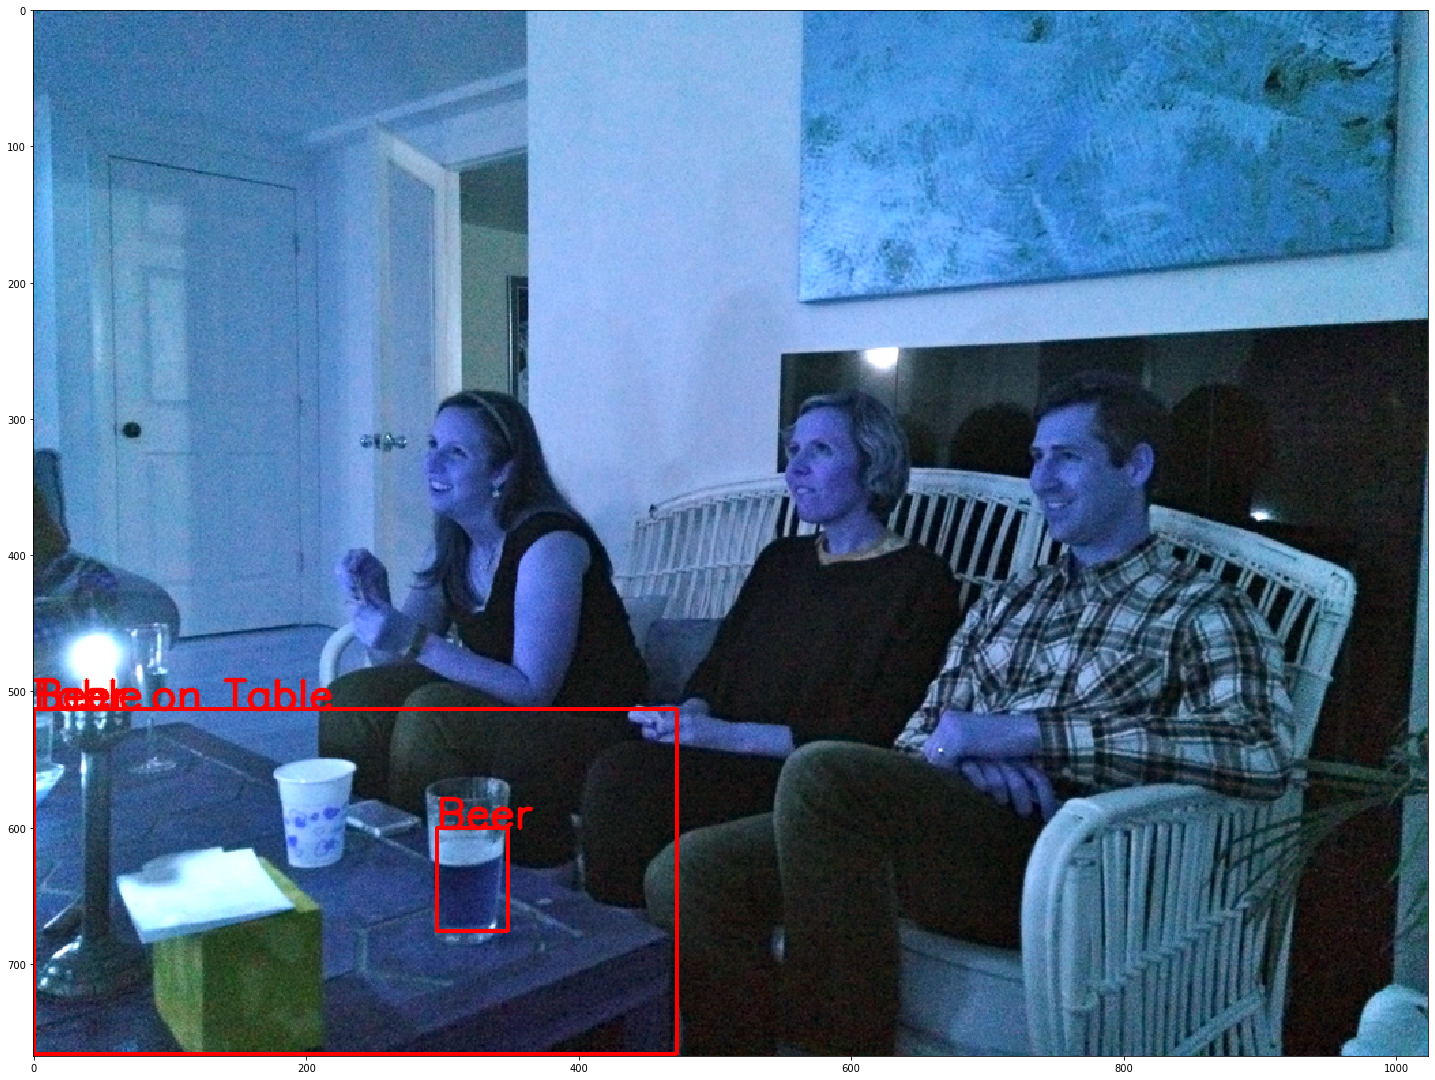

In [9]:
df_train.sample(1).apply(add_relationship_box, axis=1)

In [28]:
df_train.RelationshipLabel.value_counts()

at                111493
on                 31604
holds              20986
plays               8932
interacts_with      3756
inside_of           2392
wears                836
hits                 593
under                 34
Name: RelationshipLabel, dtype: int64

In [29]:
df_train.shape

(180626, 12)

In [30]:
df_train.ImageID.unique().shape

(57187,)